![smarkio_logo.png](img/smarkio_logo.png)

# TESTE FINAL PARA SMARKIO

## Instalando as depêndências básicas

In [ ]:
# só rode esta célula se não possuir uma destas ferramentas abaixo, lembre-se de checar a versão pip

!pip3 install numpy
!pip3 install pandas
!pip3 install matplotlib
!pip3 install seaborn
!pip3 install sklearn

## Imports

In [2]:
import pandas as pd # para leitura do arquivo e análise exploratória
import numpy as np # para manipulação dos dados
import matplotlib.pyplot as plt # para visualização
import seaborn as sns # para visualização

# referente à questão 2 e 4 sobre as métricas
from sklearn.metrics import accuracy_score  
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score

# referente à questão 3 sobre a criação de um classificador
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold

# referente à questão 5 para processamento de linguagem natural
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

# a função abaixo define que a exibição e o armazenamento dos plots devem ser no notebook
%matplotlib inline 

_______________________

## Leitura dos dados

In [3]:
'''
o arquivo fornecido possui 2 páginas. O pandas é capaz de selecionar quais páginas você deseja ler com o parâmetro 
sheet_name, armazenando a n-ésima página do arquivo.xls em dados[n] como um dict de DataFrames. No caso, eu
irei ler o arquivo e já armazenar o DataFrame que preciso na variável selecionando-a com [0]
'''

analise_ml = pd.read_excel('dados/teste_smarkio_Lbs.xls', sheet_name = [0])[0] 

______________________

## Questão 1

**Análise exploratória dos dados utilizando estatística descritiva e inferencial,
considerando uma, duas e/ou mais variáveis;**

In [4]:
analise_ml[:10] # dados da Análise_ML

,Pred_class,probabilidade,status,True_class
0,2,0.079892,approved,0.0
1,2,0.379377,approved,74.0
2,2,0.379377,approved,74.0
3,2,0.420930,approved,74.0
4,2,0.607437,approved,NaN
5,2,0.690894,approved,NaN
6,2,0.759493,approved,NaN
7,2,0.834910,approved,NaN
8,2,0.861396,approved,NaN
9,2,1.000000,approved,NaN


In [5]:
analise_ml.shape

(643, 4)

In [6]:
analise_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643 entries, 0 to 642
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pred_class     643 non-null    int64  
 1   probabilidade  643 non-null    float64
 2   status         643 non-null    object 
 3   True_class     181 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 20.2+ KB


**Acima vemos 5 amostras do nosso dataset, o shape do DataFrame e tipagem dos dados por coluna. Concluímos que o dataset possui 643 linhas e 4 colunas e que a coluna Pred_class trata-se de uma coluna de inteiros, probabilidade de valores float, status de strings e True_class também como float.**

In [7]:
# checando quantas classes fiferentes possuo e qual o range delas. Vemos que vão de 2 a 118. 
np.sort(analise_ml.Pred_class.unique())

array([  2,   3,   4,  11,  12,  15,  17,  19,  21,  22,  24,  25,  26,
        28,  29,  30,  31,  32,  33,  36,  39,  40,  43,  46,  48,  49,
        50,  52,  54,  55,  56,  58,  59,  60,  62,  63,  64,  65,  66,
        68,  69,  70,  73,  74,  76,  77,  78,  79,  81,  82,  84,  85,
        86,  87,  88,  90,  92,  93,  94,  95,  96,  98,  99, 100, 102,
       103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
       116, 118])

In [8]:
np.sort(analise_ml.Pred_class.unique()).size # possuimos 80 classes diferentes

80

In [9]:
# a coluna status é uma coluna binária
np.sort(analise_ml.status.unique())

array(['approved', 'revision'], dtype=object)

In [10]:
# checando os possíveis valores da coluna, estão em float mas aparenta ser uma coluna categórica
np.sort(analise_ml.True_class.unique())

array([  0.,   2.,   3.,   4.,  12.,  15.,  17.,  19.,  22.,  24.,  26.,
        32.,  40.,  48.,  55.,  58.,  60.,  62.,  65.,  66.,  70.,  73.,
        74.,  76.,  77.,  79.,  81.,  85.,  86.,  87.,  92.,  96.,  98.,
        99., 102., 108., 112., 115., 116., 117.,  nan])

In [11]:
np.sort(analise_ml.True_class.unique()).size # possuimos 41 classes diferentes

41

### Resumo das colunas:
- **Pred_class**:
 - int
 - 80 valores diferentes
 - coluna de variáveis discretas numéricas
- **status**:
 - strings
 - coluna binária
 - coluna de variáveis categóricas
- **probabilidade**:
 - floats
 - coluna de variáveis contínuas
- **True_class**:
 - floats
 - possui muitos valores nulos

**O método pandas.DataFrame.describe() retorna uma tabela com resumos estatísticos sobre os dados, talvez possamos encontrar informações que sejam relevantes para a compreensão melhor dos dados.**

In [12]:
analise_ml.describe().T # matriz transposta da gerada em Describe()

,count,mean,std,min,25%,50%,75%,max
Pred_class,643.0,52.712286,37.602068,2.000000,12.000000,59.000000,81.000000,118.0
probabilidade,643.0,0.622436,0.266811,0.043858,0.408017,0.616809,0.870083,1.0
True_class,181.0,38.574586,39.581017,0.000000,0.000000,24.000000,74.000000,117.0


**Há algumas informações novas que podemos tomar através desta tabela como a grande quantidade de valores nulos na coluna True_class valores estes que logo serão filtrados. Além de que, nas classes preditas, 25% delas estão abaixo de 12.0, 50% abaixo de 59, 75% abaixo de 81 e que a maior classe possui valor 118.**

____________________

### Checando valores nulos e sua distribuição

In [13]:
# subtraimos o número de linhas pelos valores que não são nulos para obtermos a quantidade de valores nulos 
# por coluna

analise_ml.shape[0] - analise_ml.count() 

Pred_class         0
probabilidade      0
status             0
True_class       462
dtype: int64

**Possuímos 462 valores nulos na coluna True_class, ou seja, devemos filtrar estes 462 valores nulos com os respectivos valores da coluna Pred_class. Para melhor visualizarmos a distribuição, plotei uma matriz onde os valores nulos estão em branco, este plot nos
ajuda a perceber que os valores nulos se distribuiem de forma uniforme pela coluna.**

<AxesSubplot:>

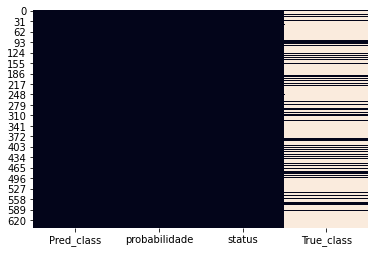

In [14]:
sns.heatmap(analise_ml.isnull(), cbar = False)
# plt.savefig('img/matriz_nulos.png', dpi = 500)

**Vamos filtrar os valors nulos considerando a regra expressa em 1.d
1.d true_class - A classe verdadeira (se nula, assumir o pred_class).**

In [15]:
for index in analise_ml.True_class[analise_ml.True_class.isna()].index: # para classes com valores null
    analise_ml.iloc[index, 3] = analise_ml.iloc[index, 0] # atribua em True_class o valor de Pred_class
    
analise_ml.shape[0] - analise_ml.count() # agora não possuímos mais valores nulos

Pred_class       0
probabilidade    0
status           0
True_class       0
dtype: int64

In [16]:
analise_ml.head(10)

,Pred_class,probabilidade,status,True_class
0,2,0.079892,approved,0.0
1,2,0.379377,approved,74.0
2,2,0.379377,approved,74.0
3,2,0.420930,approved,74.0
4,2,0.607437,approved,2.0
5,2,0.690894,approved,2.0
6,2,0.759493,approved,2.0
7,2,0.834910,approved,2.0
8,2,0.861396,approved,2.0
9,2,1.000000,approved,2.0


_________________________

Text(0.5, 1.0, 'Contagem de amostras por tipo')

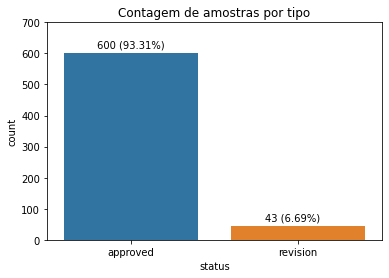

In [17]:
ax = sns.countplot(x = analise_ml.status)

# criando a porcentagem acima das barras
for p in ax.patches:
    ax.annotate('{1:} ({0:.2f}%) '.format(p.get_height()*100/len(analise_ml), # formato da string e cálculo do valor
                                          p.get_height()), # tomando a porcentagem
                                          (p.get_x()+0.2, p.get_height()+20)) # alinhamento dos valores 
ax.set_ylim(0, 700)
plt.title('Contagem de amostras por tipo')
# plt.savefig('img/contagem_status.png', dpi = 500)

**Podemos ver que o dataset tem uma grande quantidade de predições que foram aprovadas (93.31%), contrário ao número de amostras que necessitam de revisão que representa apenas 6.69% do nosso conjunto de dados.**

**Para tentarmos encontrar insights ou pelo menos para sabermos onde procurar, vamos plotar um gráfico que relacione todas as variáveis entre si e ver como estes dados se comportam.**

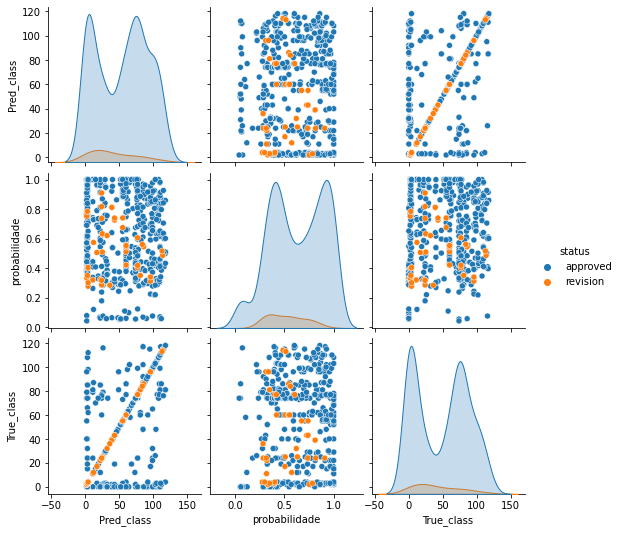

In [18]:
sns.pairplot(analise_ml, hue = 'status') 
# plot que relaciona todas as colunas numéricas entre si, diferenciadas pelo status

# plt.savefig('img/pairplot.png', dpi = 500)

**Não conseguimos tirar muitas informações deles, mas podemos afirmar algumas coisas:**
- As probabilidades das classes preditas tendem a serem maiores que 30%
- As probabilidades tendem a serem maiores para as classes maiores, vide a densidade de pontos de aprovados no primeiro quadrante do gráfico Pred_class x probabilidade, o mesmo parece ocorrer no gráfico True_class x probabilidade

**Vamos tentar entender melhor a relação entre a Pred_class com a probabilidade. Para realizar tal tarefa, vamos plotar um gráfico chamado JointGrid, ele nos mostra a relação entre duas variáveis em um espaço bidimensional.**

(0.0, 1.0)

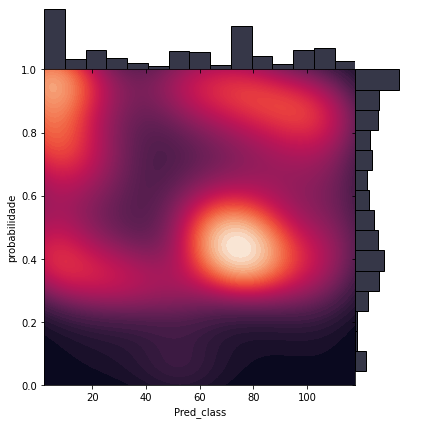

In [19]:
g = sns.JointGrid(x = analise_ml.Pred_class, y = analise_ml.probabilidade, space = 0)
g.plot_joint(sns.kdeplot,
             fill=True, clip=((2, 118), (0, 1.0)),
             thresh=0, levels=100, cmap="rocket")
g.plot_marginals(sns.histplot, color="#03051A", alpha = .8, bins = 15)
plt.xlim(0, 150)
plt.ylim(0, 1.0)
# plt.savefig('img/joint_grid_pred.png', dpi = 500)

**O histograma na parte superior é a distribuição da variável do eixo x, o histograma na lateral direita é a distribuição da variável representada no eixo y. Olhando o gráfico acima podemos perceber como se distribui a relação da classes preditas com as probabilidades, veja que as amostras que pertencem à classes entre 60 e 90 tendem a terem probabilidades entre 30% e 60%, já as classes com valores mais baixos tendem a ter uma probabilidade próxima de 100%, mas com uma intensidade menor comparada à intensidade expressa anteriormente.**

(0.0, 1.0)

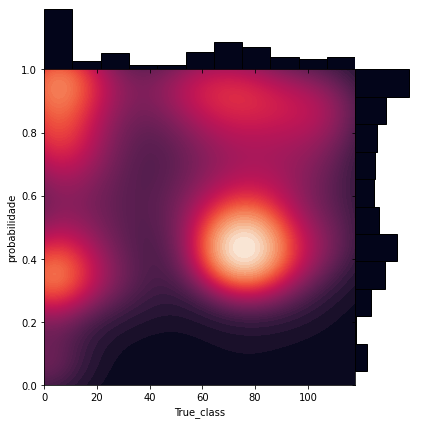

In [20]:
g = sns.JointGrid(x = analise_ml.True_class, y = analise_ml.probabilidade, space=0)
g.plot_joint(sns.kdeplot,
             fill=True, clip=((0, 118), (0, 1.0)),
             thresh=0, levels=100, cmap="rocket")
g.plot_marginals(sns.histplot, color="#03051A", alpha=1)
plt.xlim(0, 150)
plt.ylim(0, 1.0)
# plt.savefig('img/joint_grid_true.png', dpi = 500)

**Esta mesma distribuição espacial entre ocorre nas classes corretas, mas com uma intensidade ainda mais forte nas mesmas posições que no JointGrid anterior. Isto nos leva a crer que as classes entre 60 e 90 são as mais díficeis de predizer ou que é onde o algoritmo possui maior dificuldade em confiar no resultado que forneceu, este último pode ter diversas explicações, uma delas é que talvez o modelo fora treinado com poucos dados rotulados com estas classes.**

In [21]:
# separaremos os dados aprovados dos de em revisão e vamos buscar insights no conjunto dos aprovados pois 
# desta forma vamos ter informações que nos aproximem do que é a classificação correta

aprovados = analise_ml[analise_ml.status == 'approved']
revisao = analise_ml[analise_ml.status == 'revision']

In [22]:
aprovados.head()

,Pred_class,probabilidade,status,True_class
0,2,0.079892,approved,0.0
1,2,0.379377,approved,74.0
2,2,0.379377,approved,74.0
3,2,0.420930,approved,74.0
4,2,0.607437,approved,2.0


In [23]:
aprovados.shape, revisao.shape

((600, 4), (43, 4))

Text(0.5, 0, 'Número de registros')

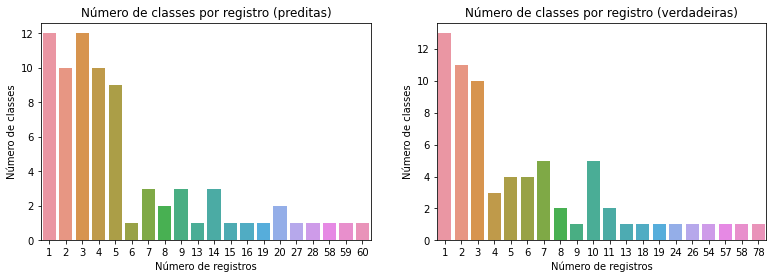

In [24]:
fig, ax = plt.subplots(1, 2, figsize = (13, 4))
sns.countplot(x = aprovados.Pred_class.value_counts(), ax = ax[0])
sns.countplot(x = aprovados.True_class.value_counts(), ax = ax[1])
ax[0].set_title('Número de classes por registro (preditas)')
ax[1].set_title('Número de classes por registro (verdadeiras)')
ax[0].set_xlabel('Número de registros')
ax[0].set_ylabel('Número de classes')
ax[1].set_ylabel('Número de classes')
ax[1].set_xlabel('Número de registros')
# plt.savefig('img/contagem_classes.png', dpi = 500)

**Acima temos um gráfico que relaciona o número de registros por número de classes. Por exemplo, no gráfico 1, 12 classes possui apenas 1 instância classificada, 10 classes possuem 2 instâncias, 12 classes possuem 3 instâncias, assim sucessivamente. Isto esclarecido, podemos afirmar que são poucas as classes que possuem muitas instâncias pertencentes a elas.**

Text(0.5, 1.0, 'Histograma das probabilidades')

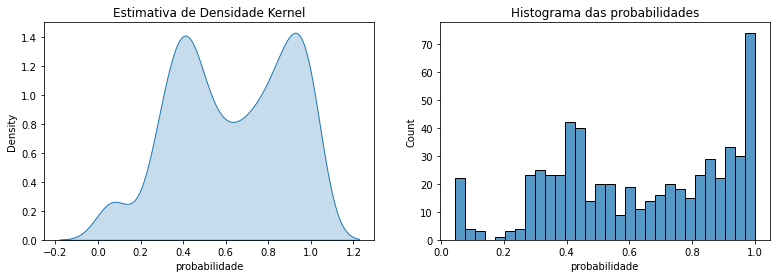

In [25]:
fig, ax = plt.subplots(1, 2, figsize = (13, 4))
sns.kdeplot(aprovados.probabilidade, fill=True, ax = ax[0]) # plot do gráfico à esquerda
sns.histplot(x = aprovados.probabilidade, ax = ax[1], bins = 30) # plot do gráfico à direita
ax[0].set_title('Estimativa de Densidade Kernel')
ax[1].set_title('Histograma das probabilidades')
# plt.savefig('img/kde_distr.png', dpi = 500)

**Os gráficos acima expressam como estão distribuídas as probabilidades, veja que a maioria das probabilidades se concentram em valores próximos a 40/45% e acima de 94%, mas com uma leve queda por volta dos 60%. Isto nos indica que o modelo aplicado para predição das classes tende a acertar muito bem, mas que em alguns casos ele se encontra razoavelmente confuso quando a confiabilide de sua predição, talvez por conta da dificuldade para predizer esta classe. <br>Talvez o gráfico de densidade gere um pouco mais de confusão pois a interpretação do eixo Y não é óbvia, este gráfico é, sumariamente falando, um gráfico cuja a área rachurada tem soma igual a 1, desta forma, supondo que eu queira saber a porcentagem das probabilidades que vão de 20% a 40%, basta calcular a área dentre 0.2 e 0.4 delimitada pela função de densidade, efetuando o cálculo da área usando integral definida, chegamos ao valor de 0.165, ou seja, 16,5% das probabilidades estão entre 20% e 40%.**

Text(0.5, 1.0, 'Contagem de de frequência por classe')

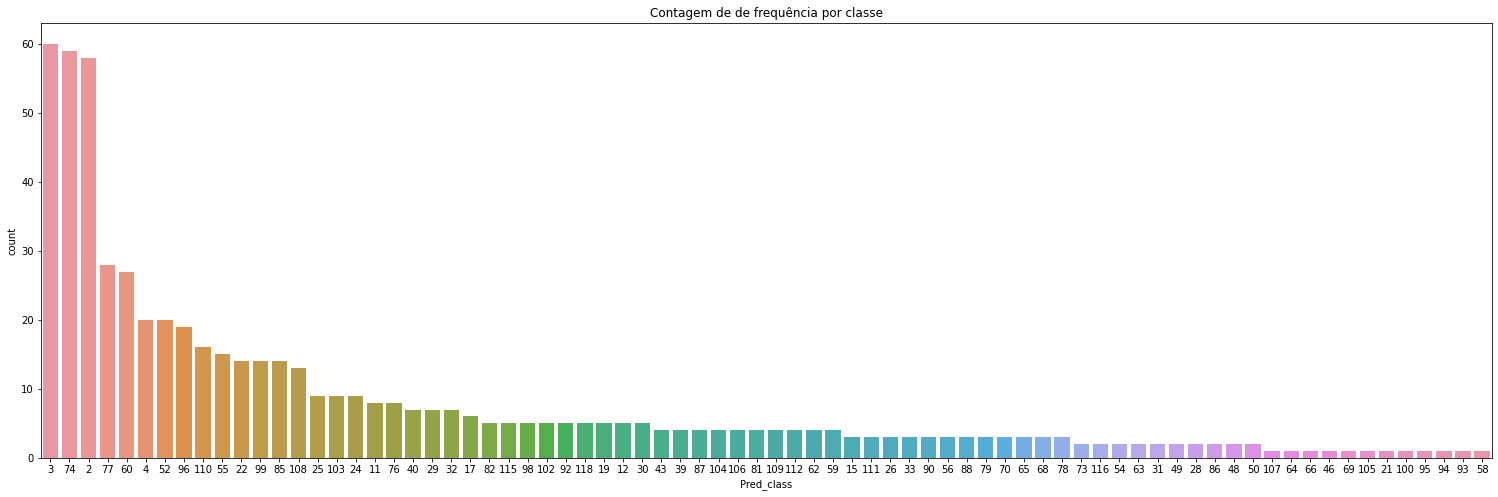

In [26]:
# abaixo iremos plotar a frequência de cada classe ordenadas pela quantidade de amostras que as representam

plt.figure(figsize = (26, 8))
ax = sns.countplot(x = aprovados.Pred_class, order = aprovados.Pred_class.value_counts().index)
plt.title('Contagem de de frequência por classe')
# plt.savefig('img/distr_classes.png', dpi = 500)

(-1.0, 76.0)

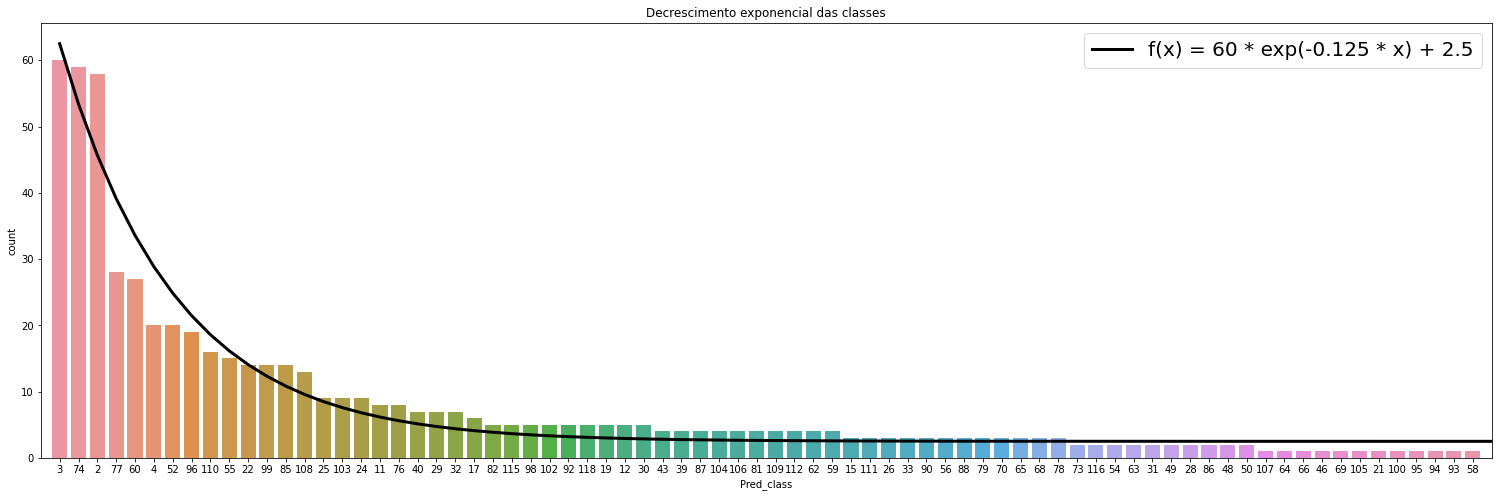

In [27]:
# abaixo farei o plot exponencial e da distribuição para comparação

# uma função exponencial é do tipo f(x) = exp(a*x) + b, para chegar em a = -0.125 e b = 2.5 fui apenas ajustando
# os valores até que a função encaixasse na distribuição, mas há métodos melhores para fazer isso

a = lambda x: 60 * np.exp(-0.125*x) + 2.5
y = np.linspace(0, 100, 77)
y = a(y)

plt.figure(figsize = (26, 8))
ax = sns.countplot(x = aprovados.Pred_class, order = aprovados.Pred_class.value_counts().index)
plt.plot(y, c ='black', lw = 3.0)
plt.title('Decrescimento exponencial das classes')
plt.legend(['f(x) = 60 * exp(-0.125 * x) + 2.5'], prop={'size': 20})
plt.xlim(-1, 76)
# plt.savefig('img/distr_classes_exp.png', dpi = 500)

In [28]:
aprovados.Pred_class.value_counts()[22]

14

**Neste dataset, vemos uma grande frequência das classes 3, 74 e 2, um pouco menos frequente se encontram as classes 77, 60, 4, 52, 96 e 110.**

## Terminamos a análise exploratória

________________________

## Questão 2 e 4

**Calcule o desempenho do modelo de classificação utilizando pelo menos três
métricas; revision estão corretos ou não (Sugestão : Técnica de cross-validation K-fold);**<br>
**Compare três métricas de avaliação aplicadas ao modelo e descreva sobre a
diferença;**

Obs: decidi por unir as questões por se tratar dos mesmos conceitos.

**Usaremos as três métricas mais utilizadas para avaliação de modelos de classificação:**
- Matriz de Confusão (Confusion Matrix)
- Pontuação de Acurácia (Accuracy Score)
- Recall Score



**A primeira métrica trata-se da matriz de confusão, esta métrica gera uma matriz cuja qual relaciona os acertos e erros do modelo. Decidi colocá-la em primeiro pois esta métrica é a origem de outras métricas utilizadas em problemas de classificação, tais como o Recall e Acurácia.**

![matriz_confusao_explicativo.png](img/matriz_confusao_explicativo.png)

**Suponha que tenhamos uma classificação binária, a classe positiva são as amostras catalogadas como 1 e na classe negativa as amostras categorizadas como 0. Em VP teríamos as amostras que foram classificadas como 1 e que de fato eram 1, analogamente com VN, predições 0 que de fato eram 0. Por outro lado, nos quadrantes falsos que é onde ocorrem os erros, temos FN que representa os registros classificados como 0 mas que eram 1 e em FP as instâncias que foram classificadas como 1 mas que, na verdade, pertenciam à classe 0.**
**Todavia, esta matriz pode ficar bem maior para problemas de classificação multiclasse. Como podemos ver abaixo:**



In [29]:
confusion_matrix(aprovados.Pred_class, aprovados.True_class)

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 2, 44,  1, ...,  0,  0,  0],
       [ 2,  0, 47, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  2,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  2]])

Text(0.5, 1.0, 'Matriz de Confusão')

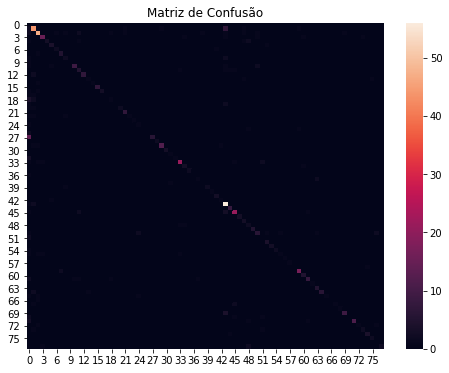

In [30]:
plt.figure(figsize = (8, 6))
sns.heatmap(confusion_matrix(aprovados.Pred_class, aprovados.True_class))
plt.title('Matriz de Confusão')
# plt.savefig('img/matriz_confu.png', dpi = 700)

**Para termos uma melhor visualização da métrica, plotaremos um HeatMap desta matriz de confusão. Os pontos mais claros representam os valores maiores. A Diagonal Principal da matriz representa os acertos, ou seja, quanto mais claro e denso esta diagonal, melhor é o modelo.**

____________________

**A segunda é a métrica de acurácia, para calcular fazemos utilizamos os valores da matriz de confusão:**
![acuracia_formula.png](img/acuracia_formula.png)

- TP = Verdadeiro Positivo
- TN = Verdadeiro Negativo
- FP = Falso Positivo
- FN = Falso Negativo

In [31]:
accuracy_score(aprovados.True_class, aprovados.Pred_class)

0.6983333333333334

**A terceira métrica é chamada Recall Score, esta métrica é calculada como o número de amostras da classe X que foram classificadas corretamente dividido por todas as amostras que foram classificadas como X, sejam elas acertadas ou não. Em outras palavras, é a capacidade que o classificador tem de identificar todas as amostras corretas (sensibilidade).**
![recall_formula.png](img/recall_formula.png)
- TP = Verdadeiro Positivo
- FN = Falso Negativo

In [32]:
# o parâmetro average deve ser especificado em caso de classificação multiclasse, o valor 'weighted' calcula a 
# pontuação levando em consideração a frequência das classes, uma vez que sabemos que as classes dos nossos dados
# não seguem uma distribuição uniforme. Existem outros valores para average, optei por este pois é o que mais me 
# faz sentido

recall_score(y_true = aprovados.True_class, y_pred = aprovados.Pred_class, average = 'weighted', zero_division = 0)

0.6983333333333334

________________

## Questão 3

**Crie um classificador que tenha como output se os dados com status igual a
'revision' estão corretos ou não (Sugestão: Técnica de cross-validation K-fold);**

**Primeiramente, prepararemos os dados dados para treino. Para isto usaremos os dados que foram aprovados.**

In [33]:
aprovados.head()

,Pred_class,probabilidade,status,True_class
0,2,0.079892,approved,0.0
1,2,0.379377,approved,74.0
2,2,0.379377,approved,74.0
3,2,0.420930,approved,74.0
4,2,0.607437,approved,2.0


In [34]:
# precisamos preparar os dados apra treino, então usei a propriedade values que retorna um numpy.array com os dados
# e ajeitei a dimensão com o método reshape

# treinei apenas com a coluna Pred_class porque ela mais a coluna probabilidade leva a uma queda de 10% da acurácia
# da DecisionTree

X = aprovados.iloc[:, 0].values.reshape(-1, 1)
Y = aprovados.iloc[:, 3]
X.shape, Y.shape

((600, 1), (600,))

**O método de validação cruzada que será utilizado é o KFold, esta técnica divide os dados de treino e teste em sessões de modo que o modelo treine por todo o dataset fornecido. Supondo que os dados sejam o conjunto (1, 2, 3, 4, 5, 6) e sejam escolhidos 2 sessões.**
- **Sessão 1:**
 - **Treino: (3, 4, 5)**
 - **Teste: (0, 1, 2)**
- **Sessão 2:** 
 - **Treino: (0, 1, 2)**
 - **Teste: (3, 4, 5)**

**Já para o modelo, decidi pelo algoritmo DecisionTreeClassfier, uma vez que os dados não são complexos e que, aparentemente, obedecem a algumas regras específicas. O classificador de árvore de decisão é "simples" e exelente para encontrar padrões e regras em conjuntos de dados. Este foi meu motivo por optar por ele.**

In [35]:
kf = KFold(n_splits = 10) # declarando a classe KFold

# definindo o modelo e que ele tenha sempre os mesmos pesos iniciais
modelo = DecisionTreeClassifier(random_state = 42) 

scores = [] # armazenando as pontuações

for treino, teste in kf.split(np.array(aprovados)): # aplicando a técnica de cross-validation
    modelo.fit(X[treino], Y[treino]) # treinando o modelo, o método fit sempre reinicia os pesos
    
    y_pred = modelo.predict(X[teste]) # predizendo os valores
    scores.append(accuracy_score(y_pred, Y[teste])) # armazenando as ponutações para média final

for i in range(len(scores)): print(f'Treino {i + 1}: {scores[i]: .4f}')
print(f'Média das Acurácias: {np.mean(scores): .4f}')

Treino 1:  0.6333
Treino 2:  0.6667
Treino 3:  0.5833
Treino 4:  0.5667
Treino 5:  0.7500
Treino 6:  0.8333
Treino 7:  0.5833
Treino 8:  0.6333
Treino 9:  0.7333
Treino 10:  0.5333
Média das Acurácias:  0.6517


(0.0, 1.0)

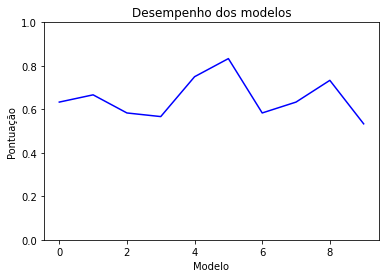

In [36]:
plt.plot(scores, c = 'blue') # plot da lista scores gerada anteriormente
plt.title('Desempenho dos modelos') 
plt.xlabel('Modelo')
plt.ylabel('Pontuação')
plt.ylim(0, 1)
# plt.savefig('img/desempenho.png', dpi = 300)

**Plotando o desempenho dos modelos que foram treinados, por algum motivo o modelo 6 foi o melhor isso, isso pode ser explicado devido a qualidade dos dados de treino na sessão 6 ou pela facilidade dos dados de teste da mesma sessão de treino.**

________________

**Vamos agora checar se o modelo fez a classificação correta dos dados.**

In [37]:
# assim como nos dados de treino, os dados que serão checados devem passar pelo mesmo tratamento
X_revisao = revisao.iloc[:, 0].values.reshape(-1, 1) 
Y_revisao = revisao.iloc[:, 3]
X_revisao.shape

(43, 1)

In [38]:
pred = modelo.predict(X_revisao)
pred

array([  2.,  24.,  24.,  25.,  25.,  25.,   0.,  55.,  77.,  77.,   0.,
       115.,  11.,  24.,  60.,   2.,   3.,   4.,  22.,  24.,  39.,  39.,
         0.,  60.,  81.,  96.,   2.,   2.,   3.,   3.,   4.,   4.,  12.,
        17.,  24.,  74.,   0.,  55.,  60.,  60.,  77.,  85.,  96.])

**Vamos comparar os valores preditos com os valores das classes verdadeiras do dataset de revisão.**

In [39]:
Y_revisao.index = range(len(Y_revisao)) # alterando o index para utilizar a estrutura de repetição abaixo com índice

# montando uma tabela dos acertos e erros, decidi fazer utilizando prints para que fosse possível 
# pintar os resultados
print('\033[1mEsperado Predito Resultado\033[92m')
for i in range(len(pred)):
    if np.array(Y_revisao == pred)[i]: print(f'\033[92m {Y_revisao[i]: =5}   {pred[i]: =5}   \033[92mAPROVADO')   
    else: print(f'\033[91m {Y_revisao[i]: =5}   {pred[i]: =5}   REPROVADO')

Esperado Predito Resultado
   2.0     2.0   APROVADO
  24.0    24.0   APROVADO
  24.0    24.0   APROVADO
  25.0    25.0   APROVADO
  25.0    25.0   APROVADO
  25.0    25.0   APROVADO
  32.0     0.0   REPROVADO
  55.0    55.0   APROVADO
  77.0    77.0   APROVADO
  77.0    77.0   APROVADO
  86.0     0.0   REPROVADO
 114.0   115.0   REPROVADO
  11.0    11.0   APROVADO
  24.0    24.0   APROVADO
  60.0    60.0   APROVADO
   2.0     2.0   APROVADO
   3.0     3.0   APROVADO
   4.0     4.0   APROVADO
  22.0    22.0   APROVADO
  24.0    24.0   APROVADO
  39.0    39.0   APROVADO
  39.0    39.0   APROVADO
  43.0     0.0   REPROVADO
  60.0    60.0   APROVADO
  81.0    81.0   APROVADO
  96.0    96.0   APROVADO
 113.0     2.0   REPROVADO
   2.0     2.0   APROVADO
   3.0     3.0   APROVADO
   3.0     3.0   APROVADO
   4.0     4.0   APROVADO
   4.0     4.0   APROVADO
  12.0    12.0   APROVADO
  17.0    17.0   APROVADO
  24.0    24.0   APROVADO
  36.0    74.0   REPROVADO
  43.0     0.0   REPROVADO
  55

In [40]:
scores_modelo = np.where(pred == Y_revisao, 1, 0) # transformando acertos em 1 e erros em 0

acertos = scores_modelo.sum() # na lista scores_modelo, para termos num de acertos basta somar os 1's
erros = len(scores_modelo) - acertos # para os erros, basta tomar o total menos os acertos

print('Acertos:', acertos)
print('Erros:', erros)
print(f'Acurácia média: {acertos/(acertos + erros)*100: .2f}%')

Acertos: 35
Erros: 8
Acurácia média:  81.40%


Text(0, 0.5, '')

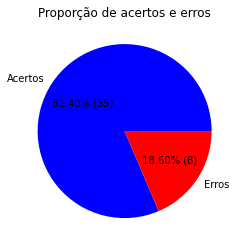

In [41]:
pd.Series(
    [acertos, erros], index = ['Acertos', 'Erros'],).plot(
    kind='pie',
    figsize=[4,4], 
    autopct=lambda p: f'{p: .2f}% ({(p/100) * len(scores_modelo):.0f})',
    colors = ['blue', 'red'],
    title = 'Proporção de acertos e erros'
)
plt.ylabel(None)
# plt.savefig('img/pie.png', dpi = 500)

## Questão 5

**Crie um classificador, a partir da segunda aba - NLP do arquivo de dados, que
permita identificar qual trecho de música corresponde às respectivas artistas listadas
(Sugestão: Naive Bayes Classifier).**

In [42]:
NLP = pd.read_excel('dados/teste_smarkio_Lbs.xls', sheet_name = [1])[1] # lendo os dados do segundo sheet

In [43]:
NLP.head()

,letra,artista
0,Jay-z Uh-uh-uh You ready b? Let's go get 'em. ...,Beyoncé
1,Your challengers are a young group from Housto...,Beyoncé
2,"Dum-da-de-da Do, do, do, do, do, do (Coming do...",Beyoncé
3,If I ain't got nothing I got you If I ain't go...,Beyoncé
4,Six inch heels She walked in the club like nob...,Beyoncé


Text(0, 0.5, 'Número de Letras')

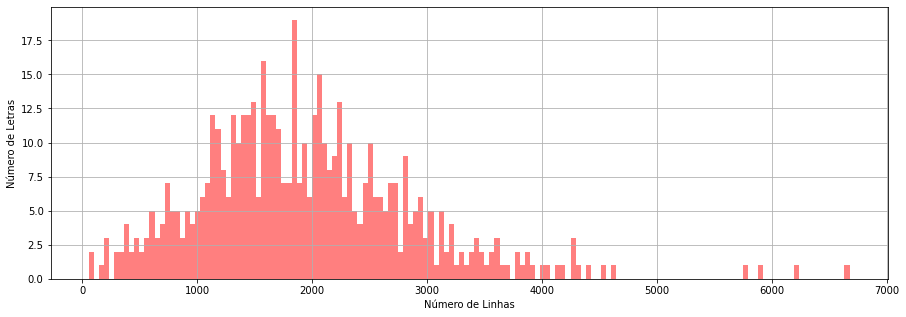

In [44]:
plt.figure(figsize = (15, 5))
NLP.letra.apply(len).hist(bins = 150, color = 'red', alpha = .5)
plt.xlabel('Número de Linhas')
plt.ylabel('Número de Letras')

**O gráfico acima demonstra que a maioria das letras das músicas possuem tamanhos entre 1000 e 3000 caracteres.**

array([<AxesSubplot:title={'center':'Beyoncé'}>,
       <AxesSubplot:title={'center':'Rihanna'}>], dtype=object)

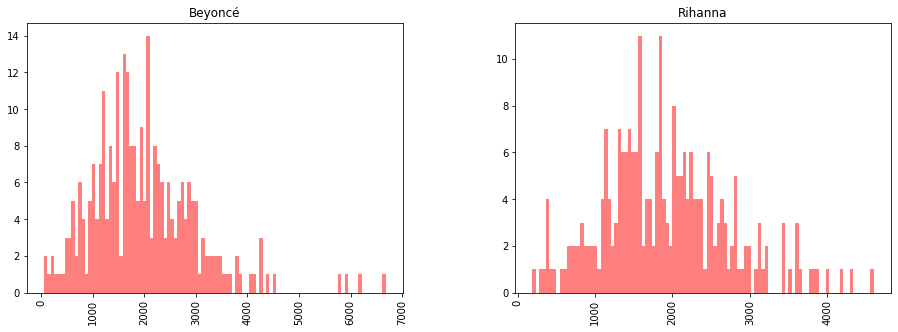

In [45]:
NLP.letra.apply(len).hist(bins = 100, color = 'red', alpha = .5, by = NLP.artista, figsize = (15, 5))

**Através destes dois gráficos, podemos concluir que as duas artisas possuem a mesma distribuição do tamanho de letras e que Beyoncé já produziu músicas com quse 7000 linhas.**

<AxesSubplot:xlabel='artista', ylabel='count'>

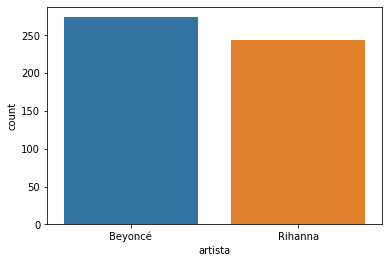

In [46]:
sns.countplot(x = NLP.artista)
# plt.savefig('img/contagem_cantoras.png', dpi = 500)

**A quantidade de amostras é muito próxima das duas classes de cantoras e isto é sempre saudável para qualquer algoritmo de Machine Learning**

________________

**Vamos iniciar o processo de classificação das músicas. Para isto, iremos precisar de preparar os dados para o treinamento.**

In [47]:
# nesta parte separaremos as features da coluna target e em seguida iremos separar o dados de treino e teste
X = NLP.letra
Y = NLP.artista

X, X_teste, Y, Y_teste = train_test_split(X, Y, test_size=0.1, random_state = 50)

**Não é possível trabalhar com textos quando estamos lidando com algoritmos de Machine Learning. Então precisamos buscar alguma representação matemática para os textos e uma maneira de fazer isso é descrita na implementação do método CountVectorizer(). <br> Este método associará a cada palavra um valor inteiro, este procedimento é chamado de Bag-of-Words, ou BoW, em seguida ele contabiliza a frequência de cada uma destas palavras presentes no texto gerando como resultado uma matriz sparse com os valores de frequência de cada palavra e com dimensão de número total de palavras encontradas no dataset.**

In [48]:
# aqui criamos uma instância de CountVectorizer e no parâmetros stop_words declaramos que estamos lidando com 
# textos em inglês. Resumidamente, Stop_words é um conjunto diversas palavras na lígua a qual foi definida.

CV = CountVectorizer(stop_words='english')

In [49]:
# aqui estamos passando os textos para a instância recém-criada para que ela conheça os textos, para que aprenda
# o vocabulário do dataset

CV.fit(NLP.letra)

CountVectorizer(stop_words='english')

In [50]:
# Finalmente estamos pré-processando os dados e os preparando para treinamento, neste ponto estamos convertendo
# os testos em vetores de frequência

X_cv = CV.transform(X)
X_teste_cv = CV.transform(X_teste)

In [51]:
modelo = MultinomialNB().fit(X_cv, Y)
pred_nlp = modelo.predict(X_teste_cv)

In [52]:
scores_modelo2 = np.where(pred_nlp == Y_teste, 1, 0) # como feito anteriormente, acertos 1 e erros 0

acertos = scores_modelo2.sum() # soma dos 1's para número de acertos
erros = len(scores_modelo2) - acertos # erro é o total menos os acertos

print('Acertos:', acertos)
print('Erros:', erros)
print(f'Acurácia média: {acertos/(acertos + erros)*100: .2f}%')

Acertos: 42
Erros: 10
Acurácia média:  80.77%


Text(0, 0.5, '')

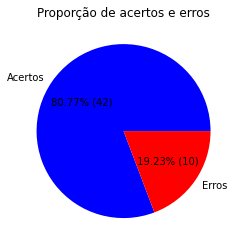

In [53]:
pd.Series(
    [acertos, erros], index = ['Acertos', 'Erros'],).plot(
    kind='pie',
    figsize=[4,4], 
    autopct=lambda p: f'{p: .2f}% ({(p/100) * len(scores_modelo2):.0f})',
    colors = ['blue', 'red'],
    title = 'Proporção de acertos e erros'
)
plt.ylabel(None)
# plt.savefig('img/pie_nlp.png', dpi = 500)